# Язык Python

### Основыне применения языка Python

- Разработка веб-приложений (стартапы)
- Скрипты (автоматизация рутинных задач, системное администрирование)
- Анализ данных
- Машинное обучение "из коробки"
  - Решать прикладные задачи готовыми алгоритмами - да
  - Создавать свои алгоритмы - нет (скорее всего, понадобится C/C++/Rust)

### Плюсы языка Python

- Очень простой и понятный синтаксис
- Относительно продуманная архитектура
- Совместимость по памяти с низкоуровневыми языками (C/C++/Rust)

### За счёт этих особенностей

- Python "склеивает" разные технологии между собой
  - Использовался в YouTube, DropBox, Google, Instagram, Spotify, BitTorrent...
  - Но только с Python вы не сможете сделать свой YouTube :)
- Python - главный язык программирования для не-программистов
  - Учёныe
  - Data Scientists
  - DevOps (системное администрирование)
- Какая бы новая область не появилась - её захватит Python
- Если у вас есть задача - скорее всего, есть библиотека на Python для её решения

📝 Придумайте любую прикладную задачу и попробуйте нагуглить библиотеку или гайд для её решения!

### Минусы языка Python

- Медленный
  - Trade-off между скоростью и удобством
  - Большая часть вычислений происходит за счёт других языков (C/C++/Rust)
- Плохо подходит для разработки сложных систем

### Python с точки зрения программиста

- Интерпретируемый
  - Код компилируетс в байт-код (промежуточный этап, что-то вроде РНК при синтезе белка)
  - Интерпретатор (программа, которую вы ставите на помьютер) понимает байт-код и выполняет его
  - Удобно и кроссплатформенно, но медленно

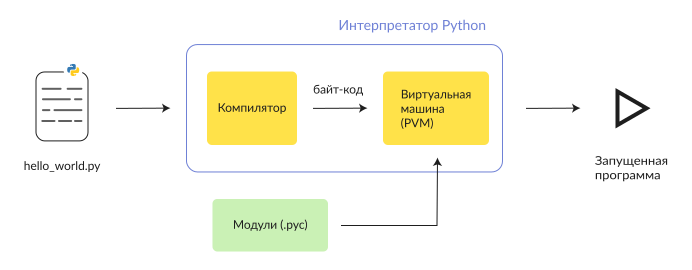

In [1]:
from IPython.display import SVG, display

display(SVG('python.svg'))

- Высокоуровневый
  - Не нужно заботиться о памяти
  - Много встроенных функций

# Демонстрация: популярность языков

### Imports and setup

In [2]:
! pip install tiobeindexpy pandas seaborn matplotlib

Если у вас проблемы с импортом tiobeindexpy - попробуйте `! pip install lxml`

In [3]:
from tiobeindexpy import tiobeindexpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string

### Get the data

In [4]:
df = tiobeindexpy.top_20()
df.head()

,Dec 2022,Dec 2021,Change,Programming Language,Programming Language.1,Ratings,Change.1
0,1,1,NaN,NaN,Python,16.66%,+3.76%
1,2,2,NaN,NaN,C,16.56%,+4.77%
2,3,4,NaN,NaN,C++,11.94%,+4.21%
3,4,3,NaN,NaN,Java,11.82%,+1.70%
4,5,5,NaN,NaN,C#,4.92%,-1.48%


📝 А как считать данные из excel-файла? Подсказка: функция `pd.something()`, чтобы найти функцию, используйте возможности IDE

In [ ]:
pd.read_excel('path_to_file.xlsx')

### Clean the data

In [6]:
df.dropna(axis='columns', inplace=True)
df.head()

,Dec 2022,Dec 2021,Programming Language.1,Ratings,Change.1
0,1,1,Python,16.66%,+3.76%
1,2,2,C,16.56%,+4.77%
2,3,4,C++,11.94%,+4.21%
3,4,3,Java,11.82%,+1.70%
4,5,5,C#,4.92%,-1.48%


📝 Как посмотреть информацию о датафрейме (то, что интуитивно приходит в голову - и есть правильный ответ)?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Dec 2022                20 non-null     int64 
 1   Dec 2021                20 non-null     int64 
 2   Programming Language.1  20 non-null     object
 3   Ratings                 20 non-null     object
 4   Change.1                20 non-null     object
dtypes: int64(2), object(3)
memory usage: 928.0+ bytes


Мы видим, что колонки `Ratings` и `Change.1` имеют Dtype `object`, но это - числа в процентах, так что нужно обработать эти данные

In [8]:
def percent_to_float(x):
    return float(x.strip('%'))

In [9]:
df['Change.1'].apply(percent_to_float).head()

0    3.76
1    4.77
2    4.21
3    1.70
4   -1.48
Name: Change.1, dtype: float64

📝 Как записать очищенные данные в соответствующие колонки?

In [10]:
df['Change.1'] = df['Change.1'].apply(percent_to_float)

In [11]:
df['Ratings'] = df['Ratings'].apply(percent_to_float)

In [12]:
df.rename(inplace=True, columns={
    'Programming Language.1':'Programming Language',
    'Change.1':'Change (%)',
    'Ratings':'Ratings (%)'
})

📝 Как вывести первые несколько строк итогового датафрейма?

In [13]:
df.head()

,Dec 2022,Dec 2021,Programming Language,Ratings (%),Change (%)
0,1,1,Python,16.66,3.76
1,2,2,C,16.56,4.77
2,3,4,C++,11.94,4.21
3,4,3,Java,11.82,1.70
4,5,5,C#,4.92,-1.48


### Plot popularity

📝 Как получить список всех колонок и записать его в переменную columns?

In [14]:
columns = df.columns

In [15]:
columns[0]

'Dec 2022'

In [16]:
label = str(columns[0])

In [17]:
def popularity_barplot(df, label, target='Programming Language', sort_by='Ratings (%)', n_top=10):

    sns.barplot(
        x=sort_by, y=target, data=df.head(n_top).sort_values(by=sort_by, ascending=False),
        palette='crest_r',
    )

    plt.title(f'Popularity of Programming Languages ({label})')
    plt.bar_label(plt.gca().containers[0], fmt='%.2f%%')

    sns.despine()
    plt.show()

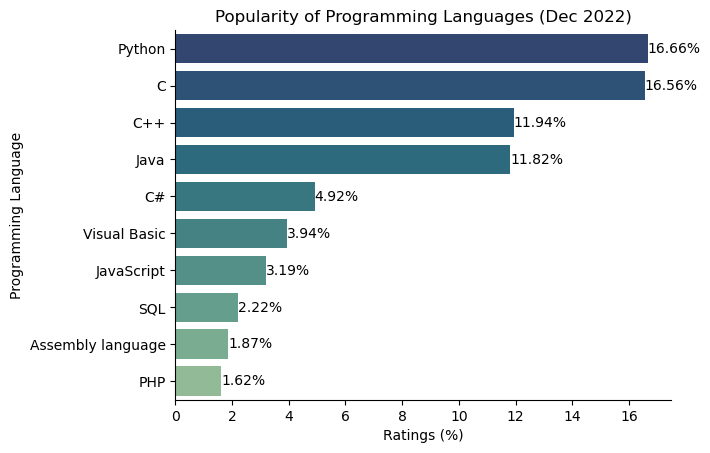

In [18]:
popularity_barplot(df, label)

In [19]:
label = columns[1] + ' - ' + columns[0]

📝 Как вывести аналогичный график для изменения популярности за последний год для 4 языков?

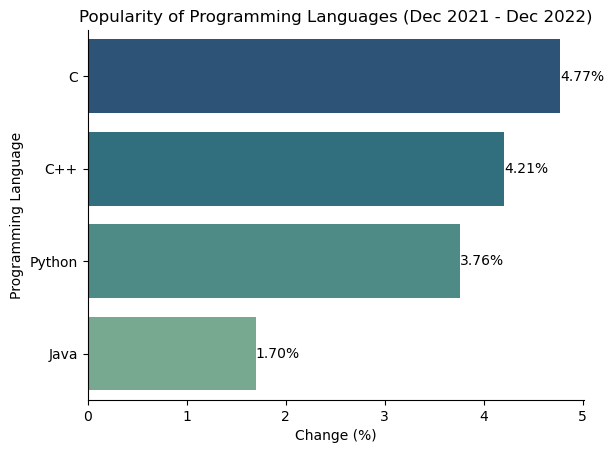

In [20]:
popularity_barplot(df, label, target='Programming Language', sort_by='Change (%)', n_top=4)

### See the change for 1 language

In [21]:
df.head()

,Dec 2022,Dec 2021,Programming Language,Ratings (%),Change (%)
0,1,1,Python,16.66,3.76
1,2,2,C,16.56,4.77
2,3,4,C++,11.94,4.21
3,4,3,Java,11.82,1.70
4,5,5,C#,4.92,-1.48


📝 Как получить процент за прошлый год и записать его в новую колонку?

In [22]:
df['Old ratings (%)'] = df['Ratings (%)'] - df['Change (%)']

In [23]:
df.head()

,Dec 2022,Dec 2021,Programming Language,Ratings (%),Change (%),Old ratings (%)
0,1,1,Python,16.66,3.76,12.90
1,2,2,C,16.56,4.77,11.79
2,3,4,C++,11.94,4.21,7.73
3,4,3,Java,11.82,1.70,10.12
4,5,5,C#,4.92,-1.48,6.40


In [24]:
df[df['Programming Language'] == 'JavaScript']

,Dec 2022,Dec 2021,Programming Language,Ratings (%),Change (%),Old ratings (%)
6,7,7,JavaScript,3.19,0.9,2.29


А теперь мы оформим проделанную работу в виде сайта с интерактивными визуализацией и таблицей! Смотрите `streamlit.py`. Чтобы запустить сайт у себя на компьютере, нужно установить `streamlit` и запустить команду `streamlit run streamlit.py` через терминал (можно использовать встроенный в IDE терминал)

In [ ]:
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# divide lst into euqal batches of size <= 3

def divide_chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

n = 3

x = list(divide_chunks(lst, n))